In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
csv_file = "cleanedICPSRpre1974.csv"
df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Race of Offender,Age at Execution,Name of Offender,Place of Execution,Jurisdiction of Exection,Crimes Committed,Method of Execution,Day,Month,Year,State,County,Sex,CountyName,StateName
0,13063,White,,KENDALL GEORGE,2,6,18,Shot,,,1608,51,95,NaN,James City County,Virginia
1,13064,White,,FRANK DANIELL,2,6,43,Hanging,1,3,1622,51,95,NaN,James City County,Virginia
2,13065,White,,CORNISH RICHARD,2,6,30,Hanging,,,1624,51,95,NaN,James City County,Virginia
3,13066,White,21,HAYLE THOMAS,2,6,2,Hanging,6,,1626,51,95,NaN,James City County,Virginia
4,5796,White,40,BILLINGTON JOHN,2,6,1,Hanging,30,9,1630,25,23,NaN,Whitman town,Massachusetts


In [3]:
#Clean Dataset for ML
df['Crimes Committed'].replace('  ', np.nan, inplace=True)
df = df[pd.notnull(df['Crimes Committed'])]

In [4]:
#Convert String to Int
df['Crimes Committed'] = df['Crimes Committed'].astype(int)

In [5]:
#Choose columns
selected_features = df[['Crimes Committed', 'Year', 'State', 'County']]

In [6]:
selected_features.head()

,Crimes Committed,Year,State,County
0,18,1608,51,95
1,43,1622,51,95
2,30,1624,51,95
3,2,1626,51,95
4,1,1630,25,23


In [7]:
#Check health of selected data
dataset_array = selected_features.values
print(dataset_array.dtype)
print(dataset_array)

int64
[[  18 1608   51   95]
 [  43 1622   51   95]
 [  30 1624   51   95]
 ...
 [   1 1966   40  121]
 [   1 1967    8   31]
 [   1 1967    6   67]]


In [8]:
X = selected_features

In [9]:
# Create a kmeans model using k = 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=100)

In [10]:
# Fit the model to the data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)

In [ ]:
# How to use this?

#from sklearn.impute import SimpleImputer

#imputer = SimpleImputer(missing_values= np.nan, strategy= 'median')

#imputer = imputer.fit(X.iloc[:, 1:3])
#X = imputer.transform(X.iloc[:, 1:3])

In [14]:
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=14090, centers=4,
                     cluster_std=0.60, random_state=0)

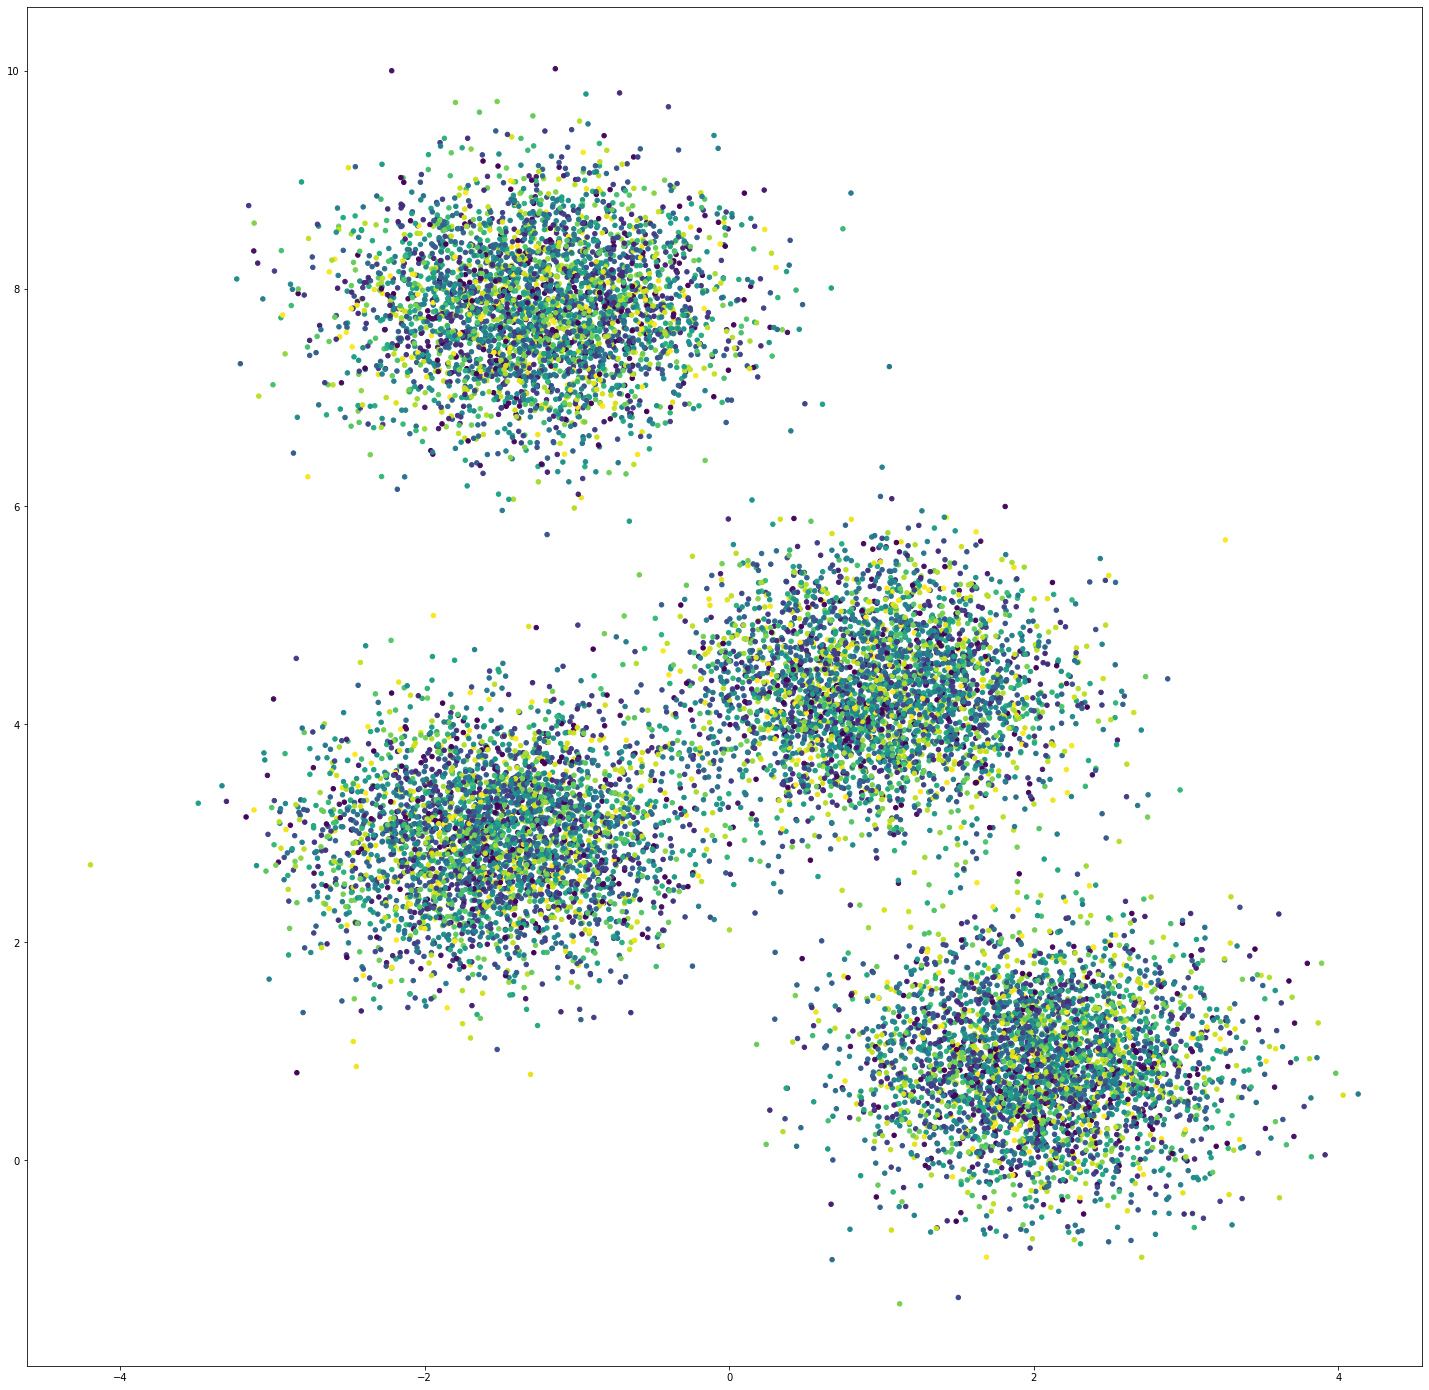

In [15]:
# Create Scatterplot
plt.figure(figsize=(25,25))
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=20, cmap='viridis')